# CAPM - Capital Asset Pricing Model 
## ou Le Modèle d'Evaluation Des Actifs Financiers (MEDAF)

Regardez la vidéo pour un aperçu complet ou lis [ceci](https://fr.wikipedia.org/wiki/Mod%C3%A8le_d%27%C3%A9valuation_des_actifs_financiers)

Rendements des portefeuilles:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Poids du Marché:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM d'un portefeuille


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Modèle CAPM en tant que simple régression linéaire

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [4]:
import pandas as pd

In [5]:
import pandas_datareader as web

In [6]:
spy_etf = web.DataReader('SPY','yahoo')

In [7]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-23 to 2020-01-22
Data columns (total 6 columns):
High         1258 non-null float64
Low          1258 non-null float64
Open         1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null float64
Adj Close    1258 non-null float64
dtypes: float64(6)
memory usage: 68.8 KB


In [8]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,206.100006,204.809998,205.789993,204.970001,117516800.0,185.742508
2015-01-26,205.559998,203.850006,204.710007,205.449997,92009700.0,186.177475
2015-01-27,204.119995,201.740005,202.970001,202.740005,134044600.0,183.721680
2015-01-28,204.289993,199.910004,204.169998,200.139999,168514300.0,181.365585
2015-01-29,202.300003,198.679993,200.380005,201.990005,173585400.0,183.042038


In [9]:
# prendre les dates du DatetimeIndex de spy_etf
start = pd.to_datetime('2015-01-23')
end = pd.to_datetime('2020-01-22')

In [10]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [11]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,113.750000,111.529999,112.300003,112.980003,46464800.0,103.807991
2015-01-26,114.360001,112.800003,113.739998,113.099998,55615000.0,103.918228
2015-01-27,112.480003,109.029999,112.419998,109.139999,95568700.0,100.279716
2015-01-28,118.120003,115.309998,117.629997,115.309998,146477100.0,105.948822
2015-01-29,119.190002,115.559998,116.320000,118.900002,84436400.0,109.247391


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

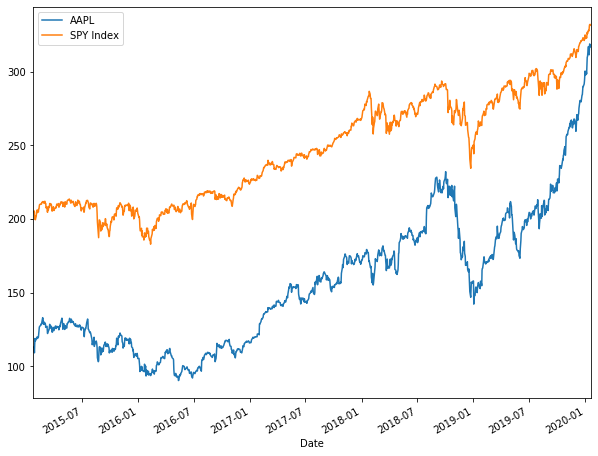

In [13]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compaison de Rendements Cumulatifs

In [14]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

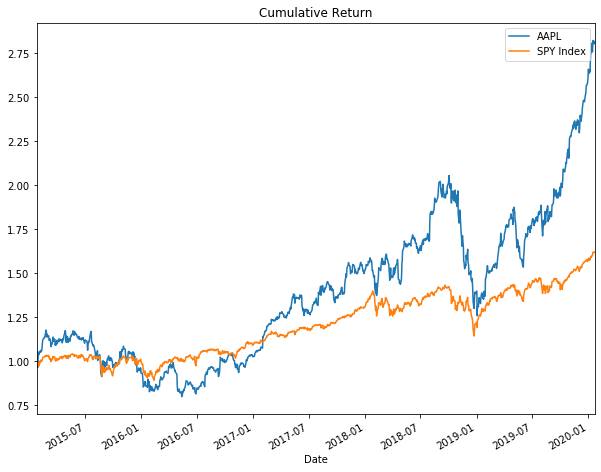

In [15]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Obtenir un Rendement Quotidien

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

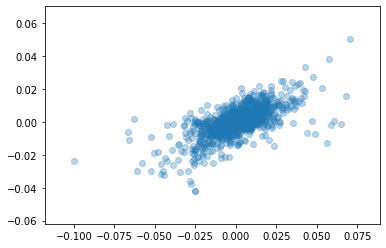

In [17]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

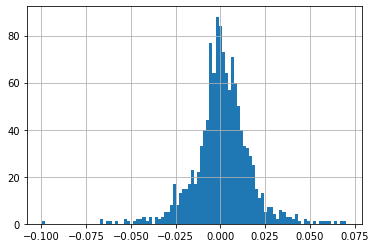

In [18]:
aapl['Daily Return'].hist(bins=100)

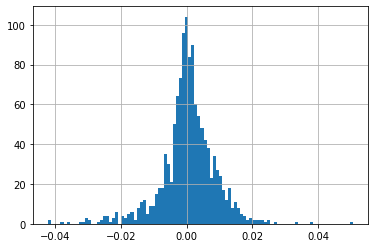

In [19]:
spy_etf['Daily Return'].hist(bins=100)

In [20]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [21]:
beta

0.36427945112845933

In [22]:
alpha

7.509655057407941e-05

In [23]:
r_value

0.6716569379192504

## Et si nos actions étaient entièrement lié au SP500 ?

In [24]:
spy_etf['Daily Return'].head()

Date
2015-01-23         NaN
2015-01-26    0.002342
2015-01-27   -0.013191
2015-01-28   -0.012824
2015-01-29    0.009244
Name: Daily Return, dtype: float64

In [25]:
import numpy as np

In [26]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [27]:
noise

array([ 7.33560734e-05, -1.10514969e-03,  3.59585924e-04, ...,
        2.50719947e-04, -4.33730167e-05,  3.05482906e-04])

In [28]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2015-01-26    0.002415
2015-01-27   -0.014296
2015-01-28   -0.012465
2015-01-29    0.009031
2015-01-30   -0.010271
                ...   
2020-01-15    0.000974
2020-01-16    0.007649
2020-01-17    0.003363
2020-01-21   -0.002002
2020-01-22    0.002298
Name: Daily Return, Length: 1257, dtype: float64

In [29]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [30]:
beta

0.9856347921712466

In [31]:
alpha

-5.02497565290158e-06

On dirait que notre compréhension est correcte !